<a href="https://colab.research.google.com/github/ldk7024/Deep_Learning_Study/blob/main/21_07_23_SimpleRNN%EC%9D%84_%ED%99%9C%EC%9A%A9%ED%95%98%EC%97%AC_%EB%8B%A8%EC%96%B4_%EC%98%88%EC%B8%A1(hello).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 간단한 단어 데이터를 만들어서 RNN의 구조를 익혀보자!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

- 글자 하나하나를 단위로 RNN을 사용해보자!
- hello, apple, lobby, daddy, bobby

In [2]:
# 문제 데이터는 hell, appl, lobb, dadd, bobb
# 정답 데이터는 o,e,y,y,y

# timesteps: 4

### 우리의 목표는 앞의 4단어를 통해서 뒤에 나올 1단어를 예측하는 것!

In [3]:
# 원핫인코딩으로 문자를 숫자로 변경
# 문제 + 정답의 전체 데이터에서 등장하는 문자는 h,e,l,o,a,p,b,y,d로 9개

In [4]:
### RNN 데이터의 구조 파악을 위해 직접 원핫인코딩을 해보자!

In [5]:
# 문제 데이터
X_train = np.array(
    [
     [ [1,0,0,0,0,0,0,0,0],[0,1,0,0,0,0,0,0,0],[0,0,1,0,0,0,0,0,0],[0,0,1,0,0,0,0,0,0] ],   # hell
     [ [0,0,0,0,1,0,0,0,0],[0,0,0,0,0,1,0,0,0],[0,0,0,0,0,1,0,0,0],[0,0,1,0,0,0,0,0,0] ],   # appl
     [ [0,0,1,0,0,0,0,0,0],[0,0,0,1,0,0,0,0,0],[0,0,0,0,0,0,1,0,0],[0,0,0,0,0,0,1,0,0] ],   # lobb
     [ [0,0,0,0,0,0,0,0,1],[0,0,0,0,1,0,0,0,0],[0,0,0,0,0,0,0,0,1],[0,0,0,0,0,0,0,0,1] ],   # dadd
     [ [0,0,0,0,0,0,1,0,0],[0,0,0,1,0,0,0,0,0],[0,0,0,0,0,0,1,0,0],[0,0,0,0,0,0,1,0,0] ],   # bobb
    ]
)

In [6]:
# 정답 데이터
y_train = np.array(
    [
     [0,0,0,1,0,0,0,0,0],   # o
     [0,1,0,0,0,0,0,0,0],   # e
     [0,0,0,0,0,0,0,1,0],   # y
     [0,0,0,0,0,0,0,1,0],   # y
     [0,0,0,0,0,0,0,1,0]    # y
    ]
)

In [7]:
X_train.shape, y_train.shape
# samples (데이터의 수), timesteps(순환 횟수), fetures(데이터의 특성 수 = 원핫인코딩된 레이블 수)

((5, 4, 9), (5, 9))

- 출력되는 값을 영어 알파벳 전체로 하고 싶다면 26개로 원핫인코딩을 하면 됨
- 현재는 RNN을 알아보기 위해 간단히 9개의 단어로만 문제와 정답을 설정

### RNN 신경망 모델링

In [8]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

- 입력층은 문제 데이터를 보고, 출력층은 정답 데이터를 보고 결정할 것!

In [9]:
model = Sequential()

# 입력층 + 중간층
# 8개의 뉴런을 가지고 각 뉴런이 4번씩 순환하며 각 순화마다 9개의 숫자가 들어감
model.add(SimpleRNN(8,input_shape=(4,9)))

# 출력층
# 사용되는 단어가 총 9개이고, 그 중에서 정답(다음에 나올 단어)을 찾아내는 것이기 때문에 다중분류
model.add(Dense(9,activation='softmax'))

model.summary()

# RNN은 가중치가 두 종류가 있음 (과거데이터의 가중치, 현재 데이터의 가중치)
# 현재데이터의 가중치 -> 9(입력특성) * 8(RNN층의 뉴런수)+ 8(RNN층의 뉴런수)
# 과거데이터의 가중치 -> 8(RNN층 뉴런수) * 8(RNN층 뉴런수)
# RNN층의 각 뉴런층에 뽑아낸 결과값은 다시 모든 뉴런들에게 과거데이터로 들어가게 됨
# 순환횟수와는 상관없이 최종 결과 값에 대한 가중치를 카운트

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 8)                 144       
_________________________________________________________________
dense (Dense)                (None, 9)                 81        
Total params: 225
Trainable params: 225
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(loss='categorical_crossentropy',
              optimizer= 'Adam',
              metrics=['acc']
              )

In [12]:
h = model.fit(X_train, y_train, epochs=200)

Epoch 1/200
1/1 [==============================] - 2s 2s/step - loss: 2.3152 - acc: 0.0000e+00
Epoch 2/200
1/1 [==============================] - 0s 6ms/step - loss: 2.3009 - acc: 0.0000e+00
Epoch 3/200
1/1 [==============================] - 0s 6ms/step - loss: 2.2866 - acc: 0.0000e+00
Epoch 4/200
1/1 [==============================] - 0s 5ms/step - loss: 2.2724 - acc: 0.0000e+00
Epoch 5/200
1/1 [==============================] - 0s 6ms/step - loss: 2.2583 - acc: 0.0000e+00
Epoch 6/200
1/1 [==============================] - 0s 6ms/step - loss: 2.2442 - acc: 0.0000e+00
Epoch 7/200
1/1 [==============================] - 0s 5ms/step - loss: 2.2302 - acc: 0.0000e+00
Epoch 8/200
1/1 [==============================] - 0s 6ms/step - loss: 2.2163 - acc: 0.0000e+00
Epoch 9/200
1/1 [==============================] - 0s 7ms/step - loss: 2.2024 - acc: 0.0000e+00
Epoch 10/200
1/1 [==============================] - 0s 6ms/step - loss: 2.1886 - acc: 0.2000
Epoch 11/200
1/1 [==========================

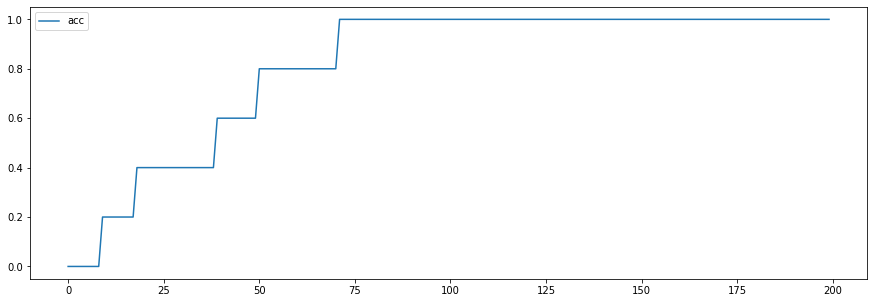

In [13]:
plt.figure(figsize=(15,5))
plt.plot(h.history['acc'],
         label='acc'
          )
plt.legend()
plt.show()